In [1]:

from fft import *
import matplotlib.pyplot as plt
from PIL import Image

## Read and preprocess the image

In [2]:
img_path = 'images/1.jpg'
img = Image.open(img_path).convert('L')
img_arr = np.array(img, dtype=float)
img_arr = img_arr / 255.0

## Define a Laplacian filter

In [3]:
laplacian_filter = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]], dtype=float)

## Define convolution and helper functions (2D)

In [4]:
def linear_convolution2d_direct(x, h):
    """
    Compute the linear convolution of 2D arrays x and h using nested loops.
    The output shape is (x_rows + h_rows - 1, x_cols + h_cols - 1).
    WARNING: This implementation can be slow for large images.
    """
    x = np.asarray(x, dtype=complex)
    h = np.asarray(h, dtype=complex)
    x_rows, x_cols = x.shape
    h_rows, h_cols = h.shape
    out_rows = x_rows + h_rows - 1
    out_cols = x_cols + h_cols - 1
    y = np.zeros((out_rows, out_cols), dtype=complex)
    for i in range(x_rows):
        for j in range(x_cols):
            for m in range(h_rows):
                for n in range(h_cols):
                    y[i + m, j + n] += x[i, j] * h[m, n]
    return y

def linear_convolution2d_fft(x, h):
    """
    Compute the linear convolution of 2D arrays x and h using FFT.
    Both x and h are zero-padded to shape (x_rows+h_rows-1, x_cols+h_cols-1)
    before computing the FFTs.
    """
    x = np.asarray(x, dtype=complex)
    h = np.asarray(h, dtype=complex)
    x_rows, x_cols = x.shape
    h_rows, h_cols = h.shape
    out_rows = x_rows + h_rows - 1
    out_cols = x_cols + h_cols - 1
    # Zero-pad x and h to the output shape
    x_padded = np.pad(x, ((0, out_rows - x_rows), (0, out_cols - x_cols)))
    h_padded = np.pad(h, ((0, out_rows - h_rows), (0, out_cols - h_cols)))
    X = FFT2D(x_padded)
    H = FFT2D(h_padded)
    Y = IFFT2D(X * H)
    return Y

def arrays_almost_equal(a, b, tol=1e-6):
    """
    Check if two arrays are almost equal element-wise.
    """
    return np.allclose(a, b, atol=tol)



## Test 1: FFT2D/IFFT2D recovery

In [5]:
F_img = FFT2D(img_arr)
img_rec = IFFT2D(F_img)
print("Image FFT/IFFT recovery successful:", arrays_almost_equal(img_arr, img_rec.real))

F_filter = FFT2D(laplacian_filter)
filter_rec = IFFT2D(F_filter)
print("Filter FFT/IFFT recovery successful:", arrays_almost_equal(laplacian_filter, filter_rec.real))

Image FFT/IFFT recovery successful: True
Filter FFT/IFFT recovery successful: True


## Test 2: Convolution (Direct vs. FFT-based)

In [6]:
conv_direct = linear_convolution2d_direct(img_arr, laplacian_filter)
conv_fft = linear_convolution2d_fft(img_arr, laplacian_filter)
print("Convolution equivalence (direct vs. FFT):", arrays_almost_equal(conv_direct, conv_fft))

Convolution equivalence (direct vs. FFT): True


## Plot the results

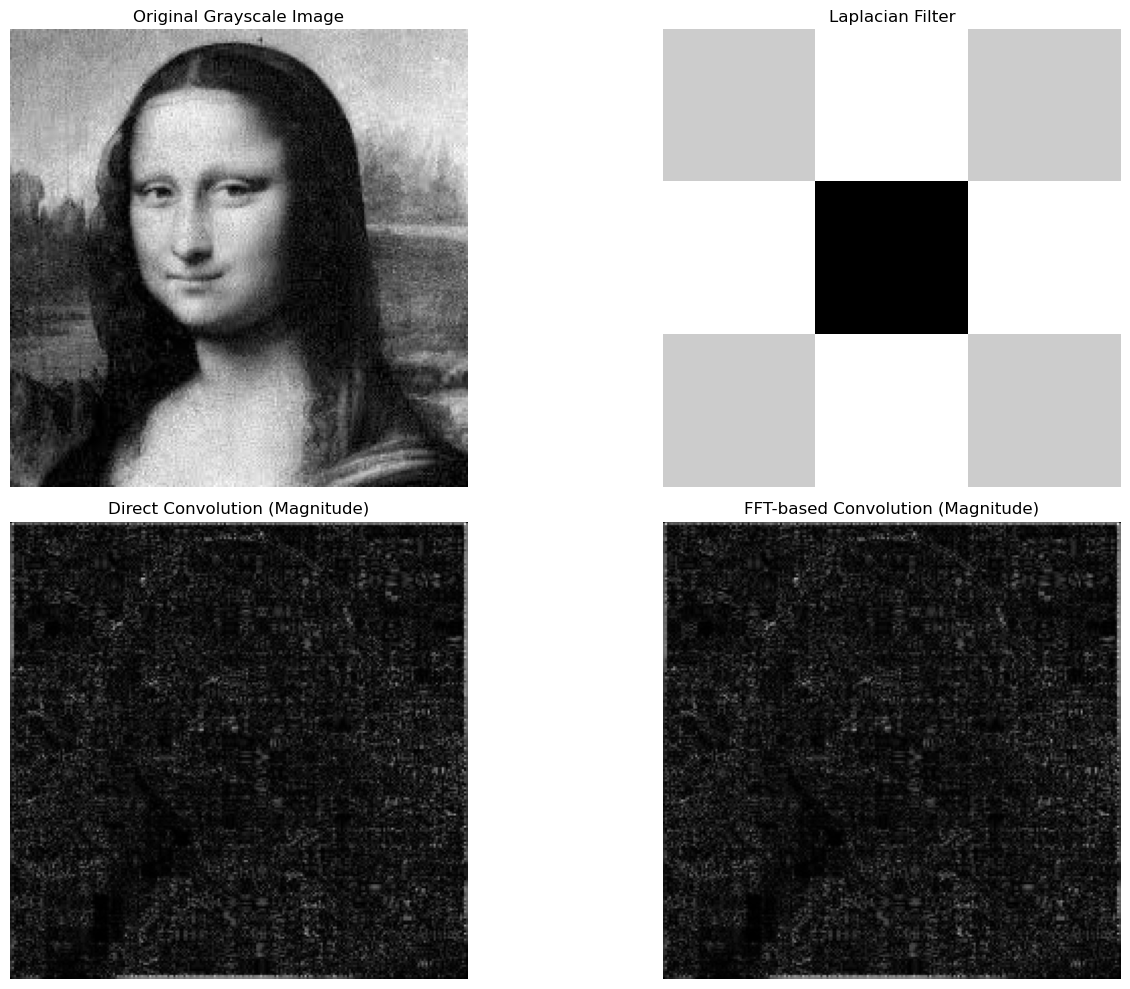

In [7]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_arr, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(laplacian_filter, cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.abs(conv_direct), cmap='gray')
plt.title('Direct Convolution (Magnitude)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(np.abs(conv_fft), cmap='gray')
plt.title('FFT-based Convolution (Magnitude)')
plt.axis('off')

plt.tight_layout()
plt.show()
